# Demo Predictions

In [1]:
from string import ascii_uppercase

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from imutils.paths import list_images
from tqdm import tqdm

from image_pipeline import pipeline_for_demo, HandDetector, BgRemover, get_img_ndarray

# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession
# config = ConfigProto()
# config.gpu_options.allow_growth = True
# session = InteractiveSession(config=config)

In [2]:
def get_norm_hand_ls(hand_img_dir: str) -> list:
    img_path_list = sorted(list(list_images(hand_img_dir)))
    # img_path_list = img_path_list[:1]

    norm_hand_ls = list()
    for image_path in tqdm(img_path_list, total=len(img_path_list)):
        alphabet = image_path.split('/')[-1].split('_')[-1].split('.')[0]
        raw_image = get_img_ndarray(image_path)
        norm_hand = pipeline_for_demo(raw_image, hdt, bgr, img_size=28)
        norm_hand_ls.append((alphabet, raw_image, norm_hand))

        # if norm_hand is not None:
        #     show_img(norm_hand, image_path)

    return norm_hand_ls


def predict(norm_hand, model):
    norm_hand = norm_hand / .255
    norm_hand = np.expand_dims(norm_hand, 0)
    pred_cls_idx = np.argmax(model.predict(norm_hand))
    pred_cls = ascii_uppercase[pred_cls_idx]

    return pred_cls


def print_prediction(norm_hand_ls: list, model, model_name, fig_size=(9, 20)):
    fig = plt.figure(figsize=fig_size)
    columns = 4
    rows = 7

    fc = 0
    ax = []  # ax enables access to manipulate each of subplots
    for i in range(columns * rows):
        if i < 26:
            label = norm_hand_ls[i][0]
            img = norm_hand_ls[i][1]
            norm_hand = norm_hand_ls[i][2]
            pred_cls = predict(norm_hand, model)
            if pred_cls != label:
                fc += 1

            title = f"{label} -> {pred_cls}"
        else:
            img = np.random.randint(1, size=(1, 1))
            title = ''

        # create subplot and append to ax
        ax.append(fig.add_subplot(rows, columns, i + 1))

        ax[-1].set_title(title)  # set title
        ax[i].set_axis_off()

        plt.imshow(img)

    plt.show()
    acc = fc / 26
    print(f"Model: {model_name}  Accuracy: {round(acc, 2)}")

    return fc, acc

# Jet's Hand

In [3]:
image_dir = 'demo-data/jet' # args

normal_model_dir = 'saved_model/normal_model'
normal_model = tf.keras.models.load_model(normal_model_dir)

stl_model_dir = 'saved_model/normal_model'
stl_model = tf.keras.models.load_model(stl_model_dir)

hdt = HandDetector()
bgr = BgRemover()
bgr.load_model()

2021-11-25 18:34:36.062511: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-25 18:34:36.068135: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-25 18:34:36.068737: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-25 18:34:36.069817: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

[INFO] - model loaded


In [4]:
norm_hand_ls = get_norm_hand_ls(image_dir)

  0%|                                                                                                                                                                  | 0/26 [00:00<?, ?it/s]

[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector


  4%|█████▉                                                                                                                                                    | 1/26 [00:02<01:05,  2.61s/it]

[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector


  8%|███████████▊                                                                                                                                              | 2/26 [00:05<01:02,  2.59s/it]

[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector


 12%|█████████████████▊                                                                                                                                        | 3/26 [00:07<00:57,  2.51s/it]

[WARN] - Failed to detect hand by hand_detector


 15%|███████████████████████▋                                                                                                                                  | 4/26 [00:09<00:49,  2.25s/it]

[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector


 31%|███████████████████████████████████████████████▍                                                                                                          | 8/26 [00:15<00:25,  1.43s/it]

[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector


 35%|█████████████████████████████████████████████████████▎                                                                                                    | 9/26 [00:17<00:31,  1.85s/it]

[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector


 38%|██████████████████████████████████████████████████████████▊                                                                                              | 10/26 [00:20<00:35,  2.23s/it]

[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector


 46%|██████████████████████████████████████████████████████████████████████▌                                                                                  | 12/26 [00:24<00:28,  2.03s/it]

[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to fetch single hand roi.
[WARN] - roi-normalize failed. By: failed to fetch hand-roi.
case 1 failed
[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to fetch single hand roi.
[WARN] - roi-normalize failed. By: failed to fetch hand-roi.
case 2 failed


 50%|████████████████████████████████████████████████████████████████████████████▌                                                                            | 13/26 [00:26<00:25,  2.00s/it]

[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector


 54%|██████████████████████████████████████████████████████████████████████████████████▍                                                                      | 14/26 [00:29<00:26,  2.18s/it]

[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to fetch single hand roi.
[WARN] - roi-normalize failed. By: failed to fetch hand-roi.
case 1 failed
[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to fetch single hand roi.
[WARN] - roi-normalize failed. By: failed to fetch hand-roi.
case 2 failed


 58%|████████████████████████████████████████████████████████████████████████████████████████▎                                                                | 15/26 [00:31<00:22,  2.08s/it]

[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector


 62%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                          | 16/26 [00:33<00:21,  2.20s/it]

[WARN] - Failed to detect hand by hand_detector


 65%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                     | 17/26 [00:35<00:18,  2.05s/it]

[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 20/26 [00:39<00:08,  1.44s/it]

[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 21/26 [00:41<00:08,  1.78s/it]

[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to fetch single hand roi.
[WARN] - roi-normalize failed. By: failed to fetch hand-roi.
case 2 failed


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 22/26 [00:44<00:07,  1.98s/it]

[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 23/26 [00:47<00:06,  2.24s/it]

[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 24/26 [00:49<00:04,  2.33s/it]

[WARN] - Failed to detect hand by hand_detector


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 25/26 [00:51<00:02,  2.15s/it]

[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:54<00:00,  2.09s/it]


## Normal Model

2021-11-25 18:35:33.372419: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8204


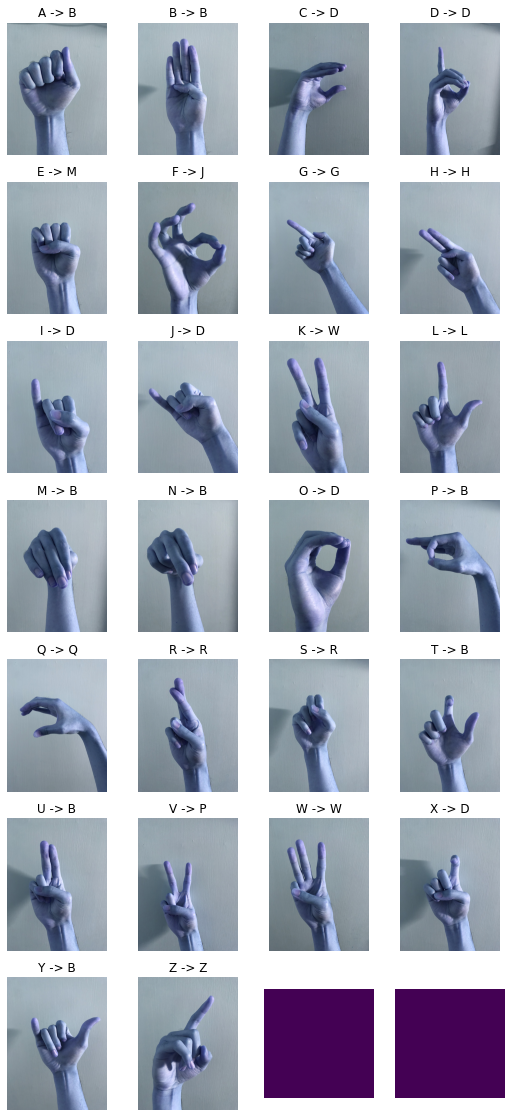

Model: Normal Model  Accuracy: 0.65


(17, 0.6538461538461539)

In [5]:
model = normal_model
print_prediction(norm_hand_ls, model, 'Normal Model')

## STL Model

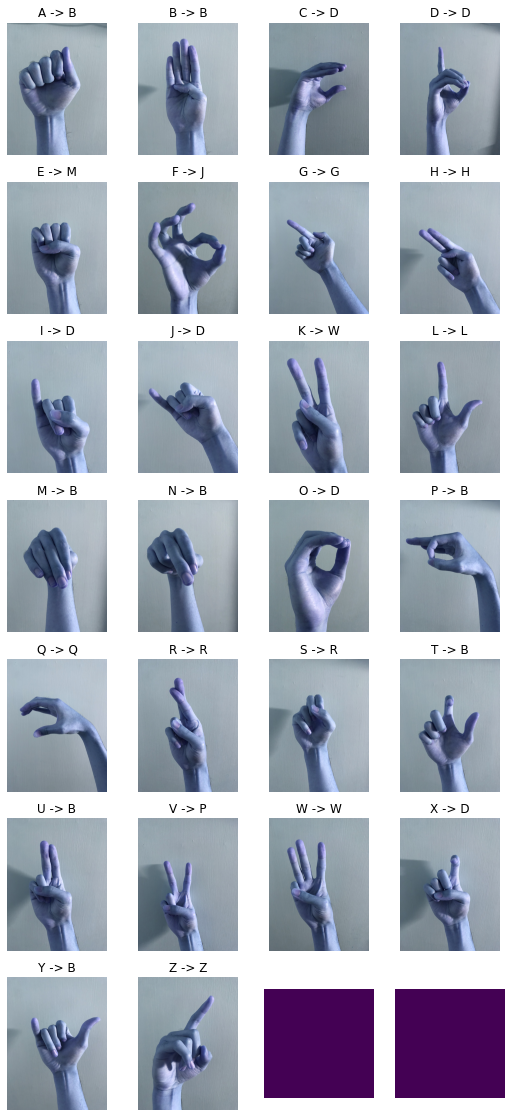

Model: STL Model  Accuracy: 0.65


(17, 0.6538461538461539)

In [6]:
model = stl_model
print_prediction(norm_hand_ls, model, 'STL Model')